Installing required dependencies and packages

In [19]:
pip install BeautifulSoup4


In [20]:
from bs4 import BeautifulSoup as soup


In [21]:
import requests
import pandas as pd

In [22]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = soup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


Creating dataframe from the content that has been scrapped

In [23]:
df=pd.DataFrame()
df['reviews']=reviews
df.head()

,reviews
0,✅ Trip Verified | I had the most fantastic BA...
1,✅ Trip Verified | Couldn’t book in online. Ar...
2,✅ Trip Verified | London Heathrow to Mumbai in...
3,"✅ Trip Verified | Keflavík, Iceland to London ..."
4,✅ Trip Verified | Terrible Experience with Bri...


In [24]:
df.shape

(1000, 1)

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

In [25]:
df.isnull().sum()

reviews    0
dtype: int64

In [26]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [27]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,I had the most fantastic BA Flight today. Th...,I had the most fantastic BA Flight today The ...
1,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...
2,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...
3,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland to London Heathrow on an A i...
4,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...


In [28]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,I had the most fantastic BA Flight today. Th...,I had the most fantastic BA Flight today The ...,"[(fantastic, a), (BA, n), (Flight, n), (today,..."
1,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[(book, n), (online, n), (Arrived, v), (check,..."
2,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...,"[(London, n), (Heathrow, n), (Mumbai, n), (Boe..."
3,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland to London Heathrow on an A i...,"[(Keflav, n), (k, n), (Iceland, n), (London, n..."
4,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...,"[(Terrible, a), (Experience, n), (British, a),..."


In [30]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I had the most fantastic BA Flight today. Th...,I had the most fantastic BA Flight today The ...,"[(fantastic, a), (BA, n), (Flight, n), (today,...",fantastic BA Flight today cabin crew seat zo...
1,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[(book, n), (online, n), (Arrived, v), (check,...",book online Arrived check find bump due over...
2,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...,"[(London, n), (Heathrow, n), (Mumbai, n), (Boe...",London Heathrow Mumbai Boeing Business Class...
3,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland to London Heathrow on an A i...,"[(Keflav, n), (k, n), (Iceland, n), (London, n...",Keflav k Iceland London Heathrow Business Cl...
4,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...,"[(Terrible, a), (Experience, n), (British, a),...",Terrible Experience British Airways book fli...


In [31]:
df[['reviews','Lemma']]

,reviews,Lemma
0,I had the most fantastic BA Flight today. Th...,fantastic BA Flight today cabin crew seat zo...
1,Couldn’t book in online. Arrived at check in...,book online Arrived check find bump due over...
2,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow Mumbai Boeing Business Class...
3,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland London Heathrow Business Cl...
4,Terrible Experience with British Airways. I b...,Terrible Experience British Airways book fli...
...,...,...
995,London to Singapore. It was a wonderful flig...,London Singapore wonderful flight lucky seat...
996,Dublin to London. I was trying to add additio...,Dublin London try add additional bag online ...
997,London - Pisa (Return). I fly this route ofte...,London Pisa Return fly route often house Tus...
998,I was in Prague flying British Airways back ...,Prague fly British Airways back Heathrow App...


Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [32]:

!pip install vaderSentiment

In [33]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I had the most fantastic BA Flight today. Th...,I had the most fantastic BA Flight today The ...,"[(fantastic, a), (BA, n), (Flight, n), (today,...",fantastic BA Flight today cabin crew seat zo...,0.9947,Positive
1,Couldn’t book in online. Arrived at check in...,Couldn t book in online Arrived at check in t...,"[(book, n), (online, n), (Arrived, v), (check,...",book online Arrived check find bump due over...,0.6486,Positive
2,London Heathrow to Mumbai in a Boeing 787-8 i...,London Heathrow to Mumbai in a Boeing in Busi...,"[(London, n), (Heathrow, n), (Mumbai, n), (Boe...",London Heathrow Mumbai Boeing Business Class...,0.9781,Positive
3,"Keflavík, Iceland to London Heathrow on an A3...",Keflav k Iceland to London Heathrow on an A i...,"[(Keflav, n), (k, n), (Iceland, n), (London, n...",Keflav k Iceland London Heathrow Business Cl...,-0.0258,Negative
4,Terrible Experience with British Airways. I b...,Terrible Experience with British Airways I bo...,"[(Terrible, a), (Experience, n), (British, a),...",Terrible Experience British Airways book fli...,0.8698,Positive


In [34]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    499
Negative    396
Neutral     105
Name: Analysis, dtype: int64

VISUAL  REPRESENTATION

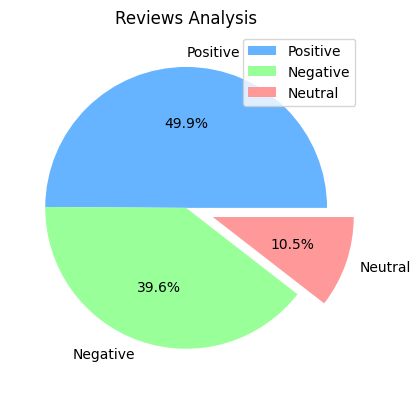

In [35]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))
#  the pie chart appearance
plt.subplot(1, 2, 1)
plt.title("Reviews Analysis")
colors = ['#66b3ff', '#99ff99', '#ff9999']  # Custom colors for the pie chart
explode = (0, 0, 0.2)  # Custom explode values to highlight a section of the pie chart

# Plot the pie chart with custom colors and explode values
plt.pie(vader_counts.values, labels=vader_counts.keys(), colors=colors, explode=explode, autopct='%1.1f%%', shadow=False)

# Add a legend
plt.legend(vader_counts.keys(), loc='upper right')

# Show the  pie chart
plt.show()


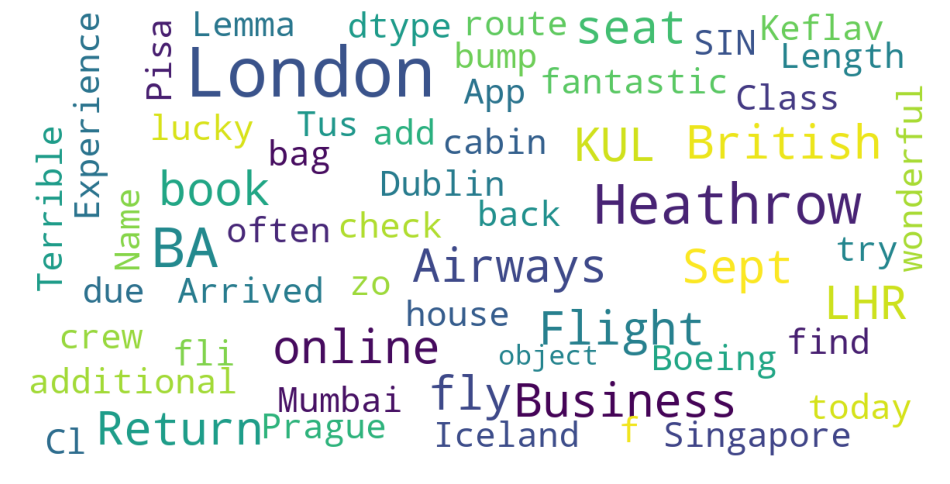

In [36]:

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)